In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt #lets us plot like MATLAB
import cv2
import os #allows python script to interact with OS
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator #tools for real time data augmentation on image data
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop #built in optimizer classes


In [13]:
img = image.load_img("data/train/triangles/drawing(1).PNG")

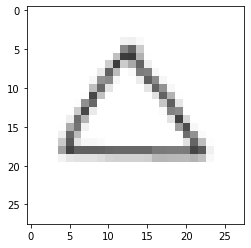

In [14]:
plt.imshow(img)

In [15]:
cv2.imread("data/train/triangles/drawing(1).PNG").shape # 'shape' gives the dimensions of the image

(28, 28, 3)

In [16]:
train = ImageDataGenerator(rescale= 1/255) #this transforms the pixel RGB value from a range of 0-255 to a range of 0-1.000
validation = ImageDataGenerator(rescale= 1/255)

In [17]:
train_dataset = train.flow_from_directory("data/train/", target_size = (28,28), batch_size = 50,
                                         class_mode = 'categorical') #generates a batch of augmented data

Found 300 images belonging to 3 classes.


In [18]:
validation_dataset = train.flow_from_directory("data/train/", target_size = (28,28), batch_size = 50,
                                         class_mode = 'categorical') #generates a batch of augmented data

Found 300 images belonging to 3 classes.


In [19]:
train_dataset.class_indices #checking indices of the classes

{'circles': 0, 'squares': 1, 'triangles': 2}

In [20]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(3, activation='softmax')]) #the layers are given in the form of a list. Activation function ReLU used in Convolutional layers and Softmax used in final layer 

In [21]:
model.compile(loss='categorical_crossentropy', #chosing loss function and optimizer class
             optimizer = tf.keras.optimizers.Adam(lr=0.001),
             metrics = ["accuracy"] )

In [22]:
model_fit=model.fit(train_dataset, steps_per_epoch = 3,
                   epochs = 100,
                   validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 1s 480ms/step - loss: 1.1005 - accuracy: 0.3467 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 62ms/step - loss: 1.0931 - accuracy: 0.4200 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 52ms/step - loss: 1.0844 - accuracy: 0.3600 - val_loss: 1.0974 - val_accuracy: 0.5133
Epoch 4/100
3/3 [==============================] - 0s 51ms/step - loss: 1.0864 - accuracy: 0.4533 - val_loss: 1.1000 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 55ms/step - loss: 1.0950 - accuracy: 0.3267 - val_loss: 1.0823 - val_accuracy: 0.3533
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 1.0815 - accuracy: 0.4267 - val_loss: 1.0865 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 55ms/step - loss: 1.0883 - accuracy: 0.3333 - val_loss: 1.0722 - val_accuracy: 0.5567
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 62ms/step - loss: 0.1357 - accuracy: 0.9733 - val_loss: 0.1238 - val_accuracy: 0.9600
Epoch 60/100
3/3 [==============================] - 0s 53ms/step - loss: 0.1354 - accuracy: 0.9600 - val_loss: 0.1066 - val_accuracy: 0.9800
Epoch 61/100
3/3 [==============================] - 0s 60ms/step - loss: 0.1080 - accuracy: 0.9800 - val_loss: 0.1098 - val_accuracy: 0.9667
Epoch 62/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0974 - accuracy: 0.9867 - val_loss: 0.0998 - val_accuracy: 0.9833
Epoch 63/100
3/3 [==============================] - 0s 61ms/step - loss: 0.1023 - accuracy: 0.9800 - val_loss: 0.0925 - val_accuracy: 0.9833
Epoch 64/100
3/3 [==============================] - 0s 53ms/step - loss: 0.1074 - accuracy: 0.9733 - val_loss: 0.0913 - val_accuracy: 0.9800
Epoch 65/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0830 - accuracy: 0.9800 - val_loss: 0.0764 - val_accuracy: 0.9867
Epoch 66/100
3/3 [========

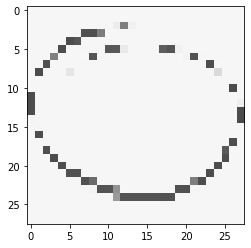

circle


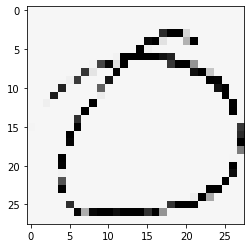

trinagle


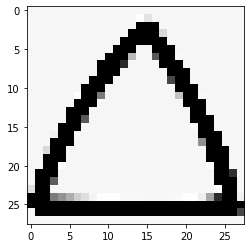

trinagle


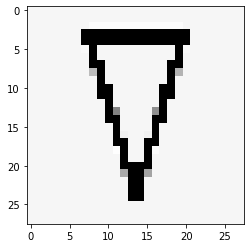

trinagle


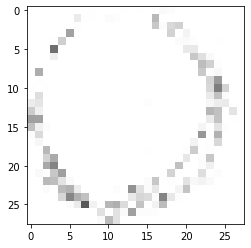

square


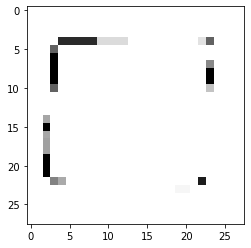

square


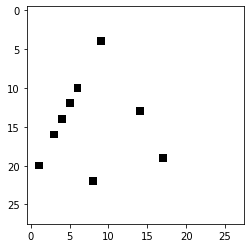

trinagle


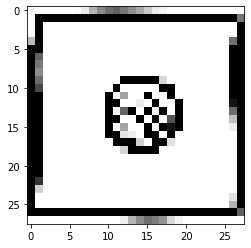

trinagle


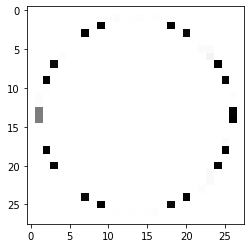

circle


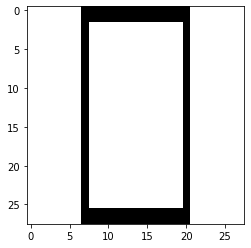

square


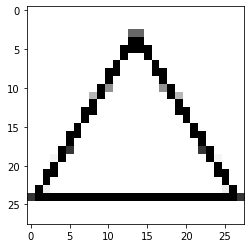

trinagle


In [23]:
dir_path = 'data/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(28,28,3)) #loads the test images and resizes them to target_size
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val.item(0) == 1:
        print('circle')
    elif val.item(1) == 1:
        print('square')
    elif val.item(2) == 1:
        print('trinagle')
   
        
        